In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()

In [2]:
fb_data = pd.read_csv('Facebook_Marketplace_data.csv',index_col= 'status_id')
fb_data.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
status_id,,,,,,,,,,,,,,,
1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


<AxesSubplot: title={'center': 'number of reactions on post over time'}, xlabel='Time', ylabel='Reactions'>

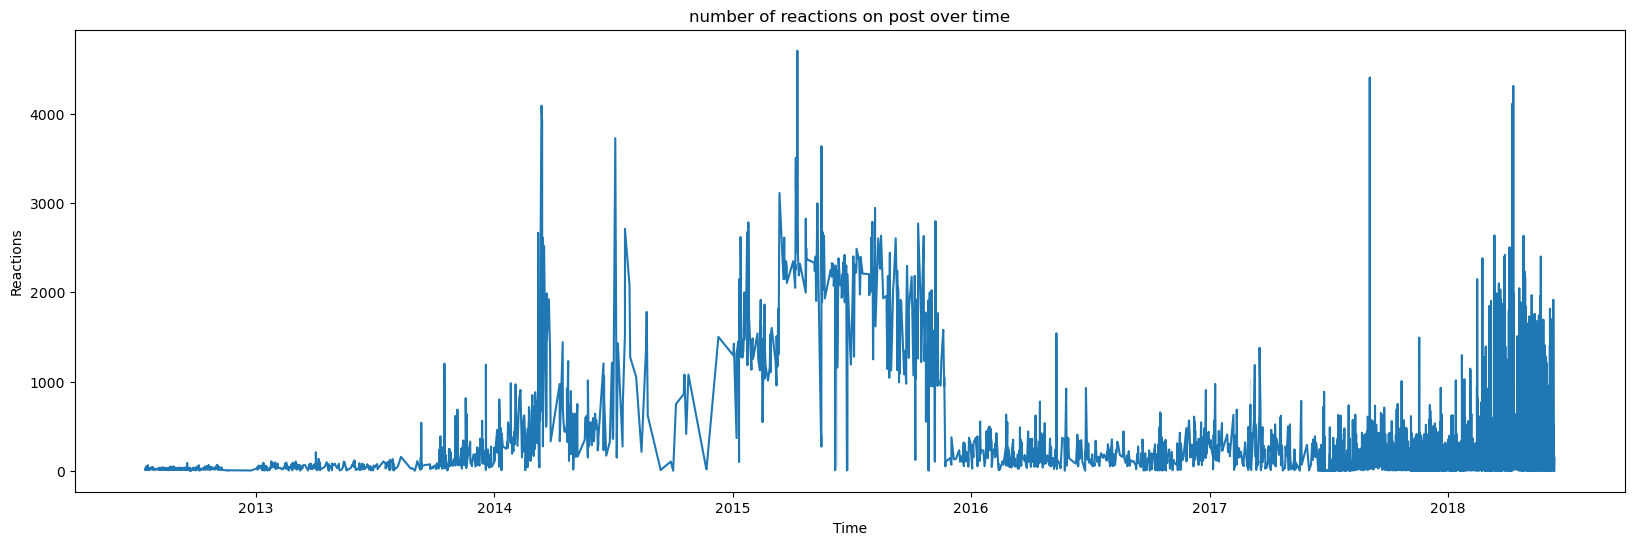

In [3]:
fb_data['status_published'] = pd.to_datetime(fb_data.status_published)
plt.figure(figsize=(20,6))
plt.title('number of reactions on post over time')
plt.ylabel('Reactions')
plt.xlabel('Time')
sns.lineplot(x = 'status_published',y = 'num_reactions' ,data = fb_data)

<AxesSubplot: xlabel='num_reactions', ylabel='num_comments'>

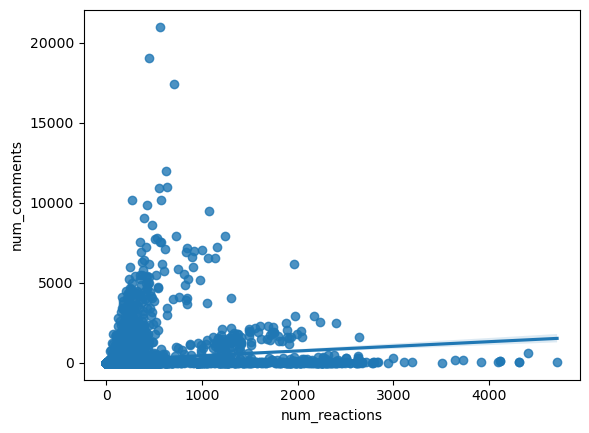

In [8]:
sns.regplot(x= 'num_reactions', y = 'num_comments',data = fb_data)


<AxesSubplot: xlabel='num_reactions', ylabel='num_shares'>

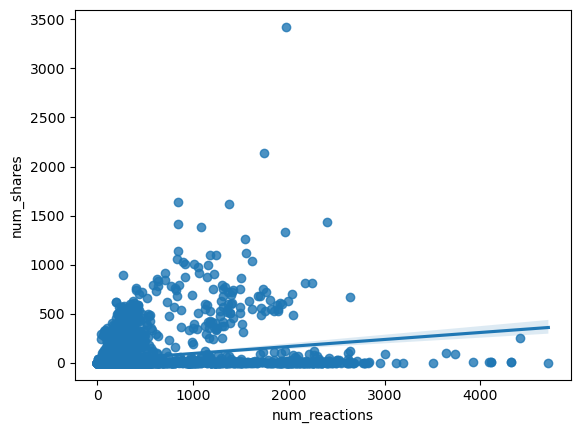

In [9]:
sns.regplot(x= 'num_reactions', y = 'num_shares',data = fb_data)


In [3]:
train_data = fb_data.drop(columns=['Column1','Column2','Column3','Column4','status_published'])

In [ ]:
# sns.jointplot(x= 'num_reactions', y = 'num_comments',data = train_data,kind ='kde',fill = True)

As we can see there is no strong corelation but we can say there is a pattern if num_reacctions is close to 0 then there is high number of commnets on it 

  
## OneHotEncoding

In [4]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False)
encoded_cols = pd.DataFrame(OH_encoder.fit_transform(train_data[['status_type']]))
encoded_cols.index = train_data.index
train_data.drop(columns=['status_type'],inplace=True)
train_data = pd.concat([train_data,encoded_cols],axis = 1)
train_data.columns = train_data.columns.astype('str')

# Ordianl Encoding 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
Ord_encoder = OrdinalEncoder()
train_data[['status_type']] = Ord_encoder.fit_transform(train_data[['status_type']])
train_data['status_type'].unique()

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data.iloc[:,:9] = sc.fit_transform(train_data.iloc[:,:9])

## Getting the Optimal cluster Number BY Elbow Method

<AxesSubplot: title={'center': 'WCSS vs No_of_Clusters'}, xlabel='No_of_Clusters', ylabel='WCSS'>

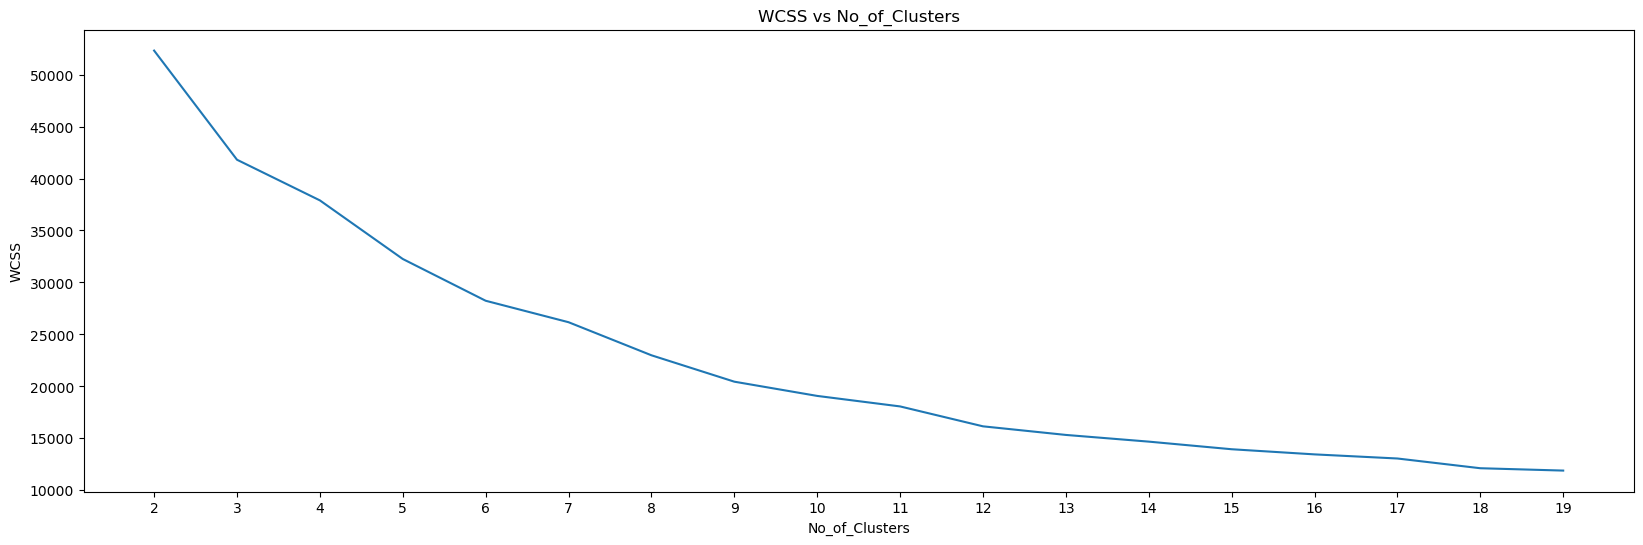

In [6]:
from sklearn.cluster import KMeans

def get_WCSS(n_clusters):
    model = KMeans(n_clusters=n_clusters,init='k-means++',random_state=37)
    model.fit(train_data)
    return model.inertia_
plt.figure(figsize=(20,6))
plt.title('WCSS vs No_of_Clusters')
plt.xlabel('No_of_Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2,20))
sns.lineplot(y=[get_WCSS(i) for i in range(2,20)],x =[i for i in range(2,20)])


As we can see from elbow method we get optimal value as 12 or 9 for cluster number

In [7]:
optimal_cluster = 3
model = KMeans(n_clusters=optimal_cluster,init='k-means++',random_state=37)
model.fit(train_data)
labels = model.predict(train_data)
labels = pd.Series(labels,index=fb_data.index)
pred_data = fb_data.copy()
pred_data['cluster'] = labels
pred_data

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,cluster
status_id,,,,,,,,,,,,,,,,
1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,0
2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,0
3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,0
4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,0
5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN,0
7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN,0
7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN,0


In [10]:
pred_data.groupby('cluster').aggregate({
    'num_reactions':'mean',
    'num_shares':'mean',
    'num_comments':'mean'})

,num_reactions,num_shares,num_comments
cluster,,,
0,111.352803,21.682744,106.369558
1,1778.772959,11.224490,59.025510
2,786.573529,512.106618,3232.705882


# **DATA INSIGHTS**

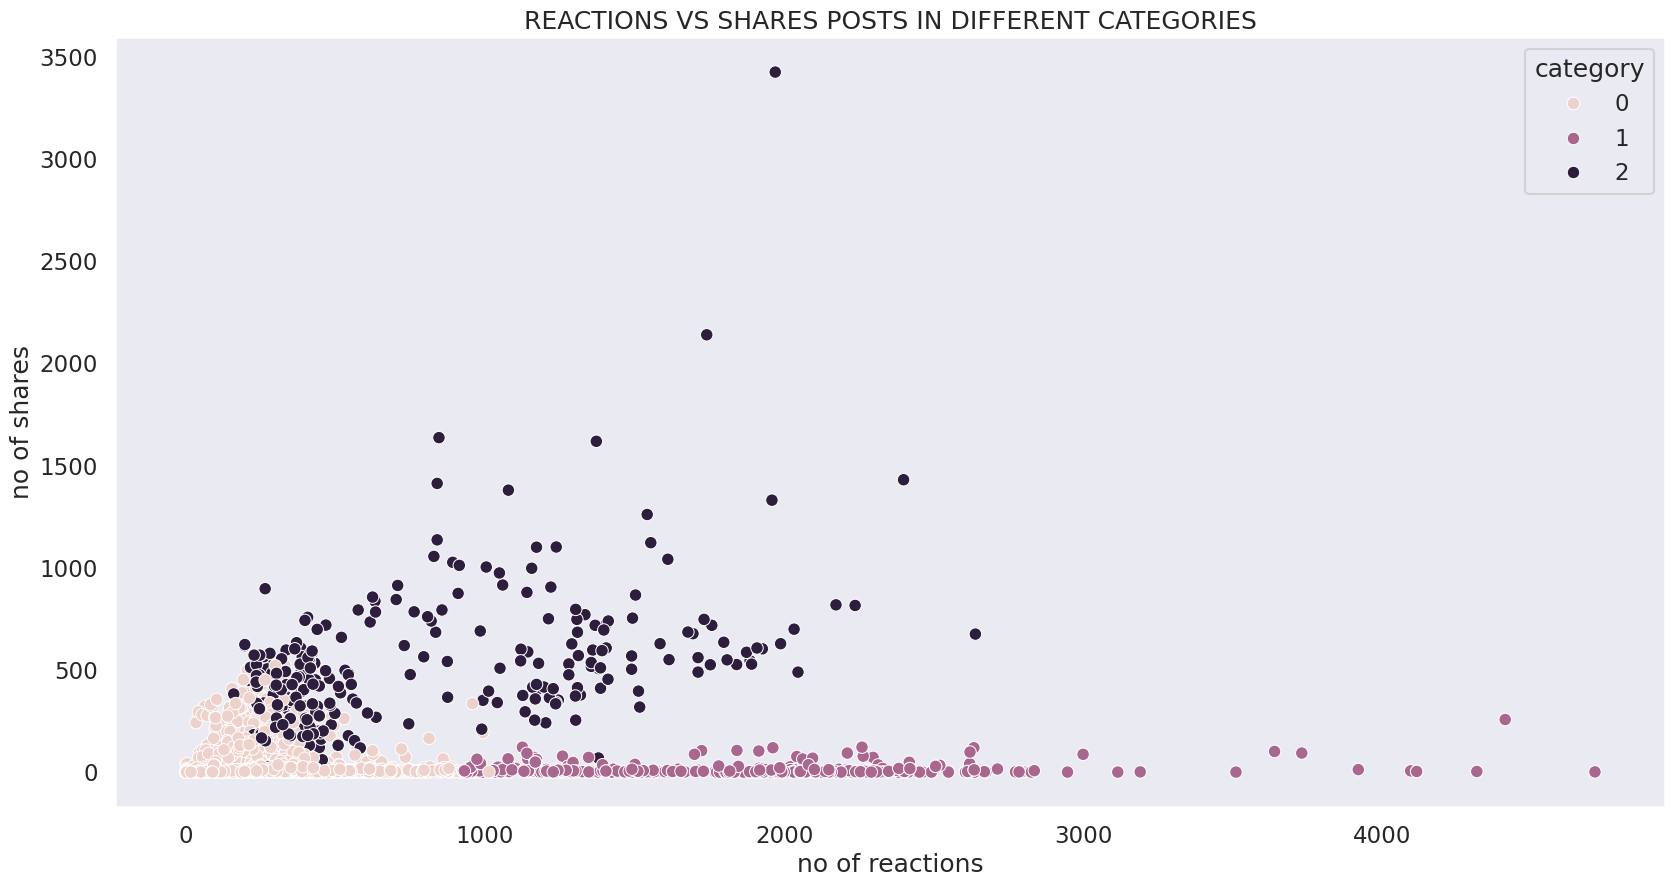

In [10]:
plt.figure(figsize=(20,10))
sns.set_style('dark')
sns.set_theme('talk')
plt.grid(False)
plt.grid(False)
plt.title('REACTIONS VS SHARES POSTS IN DIFFERENT CATEGORIES')
sns.scatterplot(x = 'num_reactions',y = 'num_shares',data = pred_data,hue = 'cluster')
plt.ylabel('no of shares')
plt.xlabel('no of reactions')
plt.legend(title='category')
plt.show()

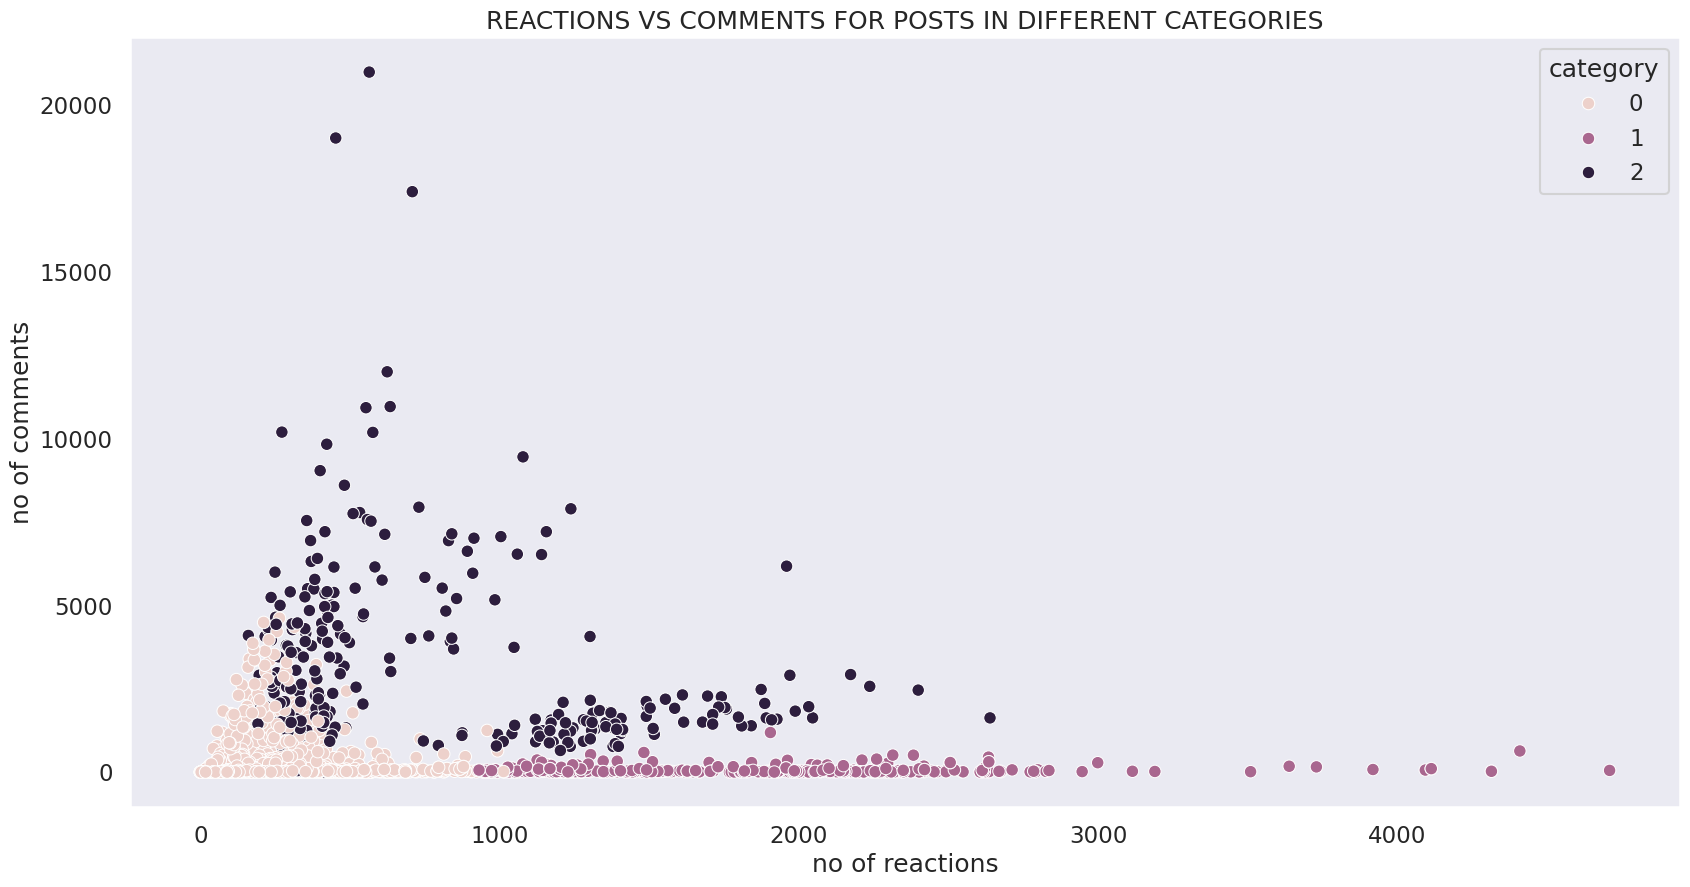

In [228]:
plt.figure(figsize=(20,10))
plt.grid(False)
plt.title('REACTIONS VS COMMENTS FOR POSTS IN DIFFERENT CATEGORIES')
sns.scatterplot(x = 'num_reactions',y = 'num_comments',data = pred_data,hue = 'cluster')
plt.xlabel('no of reactions')
plt.ylabel('no of comments')
plt.legend(title='category')
plt.show()

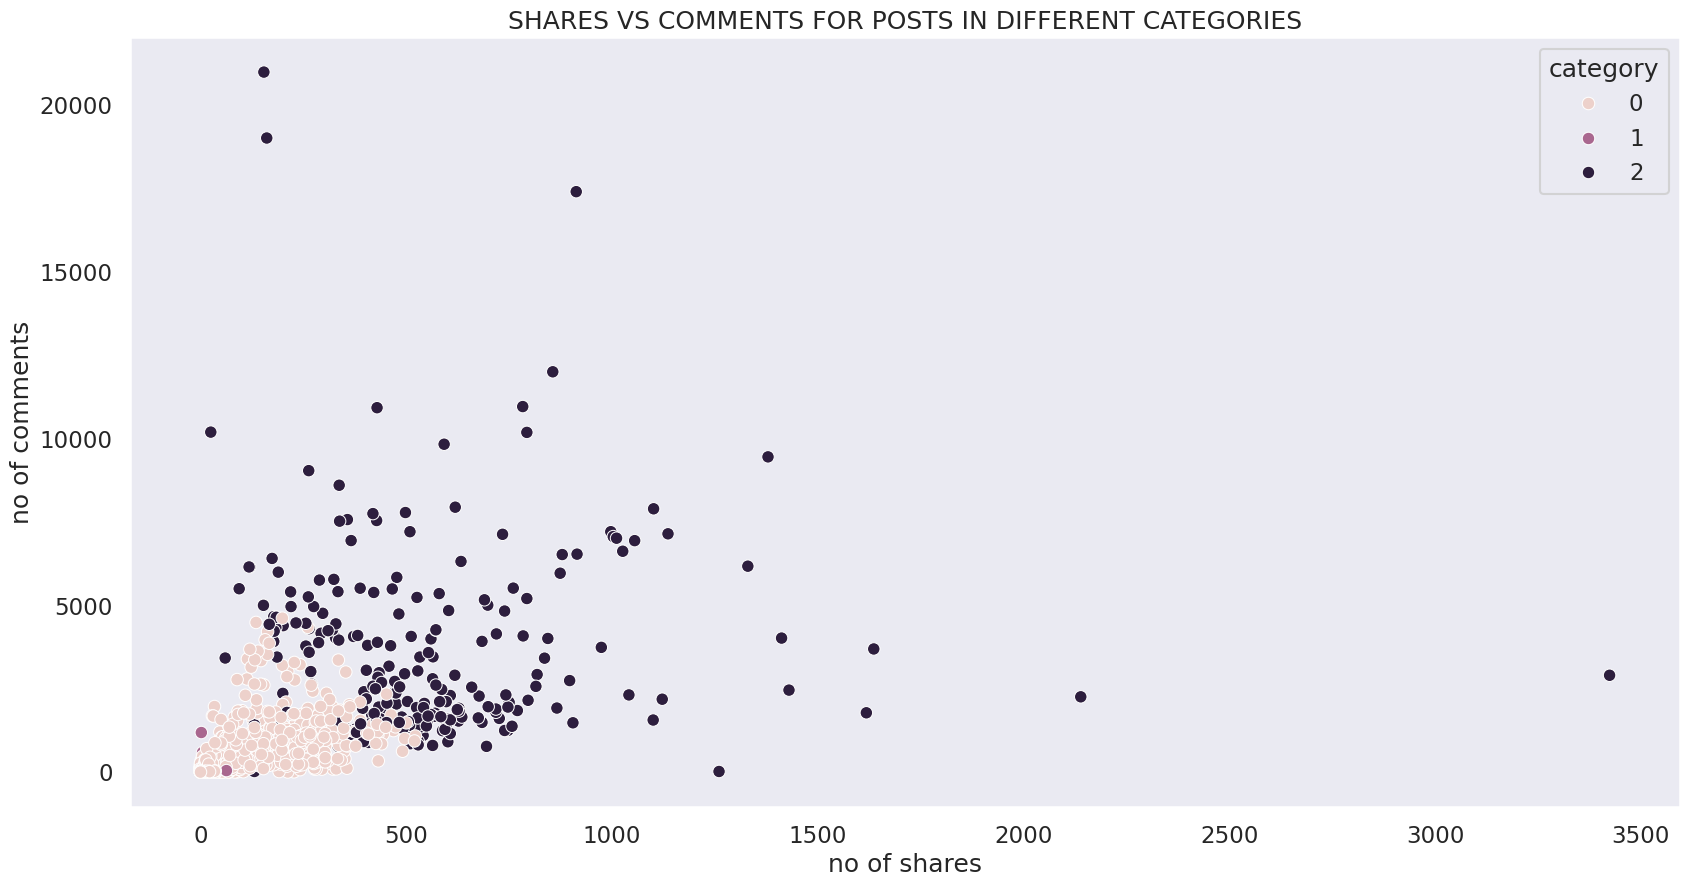

In [17]:
plt.figure(figsize=(20,10))
sns.set_theme('talk')
plt.grid(False)
plt.title('SHARES VS COMMENTS FOR POSTS IN DIFFERENT CATEGORIES')
sns.scatterplot(x = 'num_shares',y = 'num_comments',hue = pred_data['cluster'],data=pred_data)
plt.xlabel('no of shares')
plt.ylabel('no of comments')
plt.legend(title='category')
plt.show()

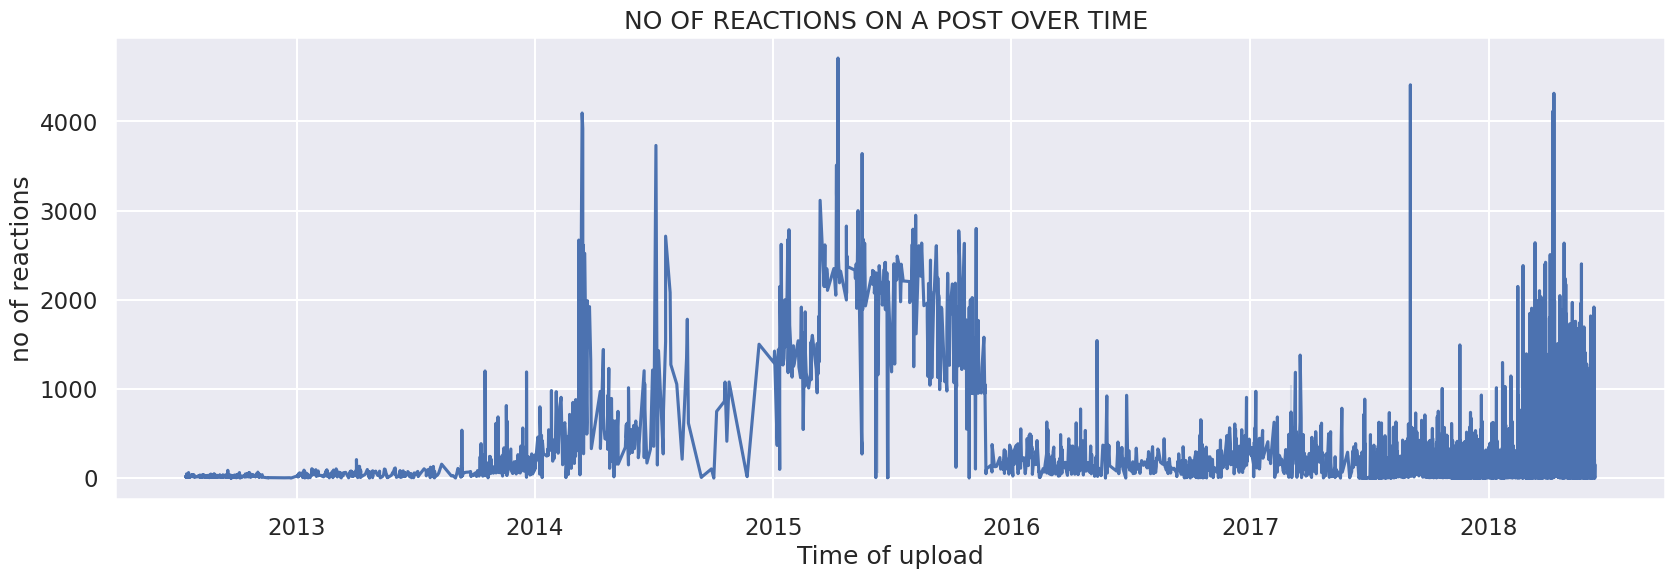

In [231]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.title('NO OF REACTIONS ON A POST OVER TIME ')
sns.lineplot(y='num_reactions',x='status_published',data = fb_data)
plt.xlabel('Time of upload')
plt.ylabel('no of reactions')
plt.show()

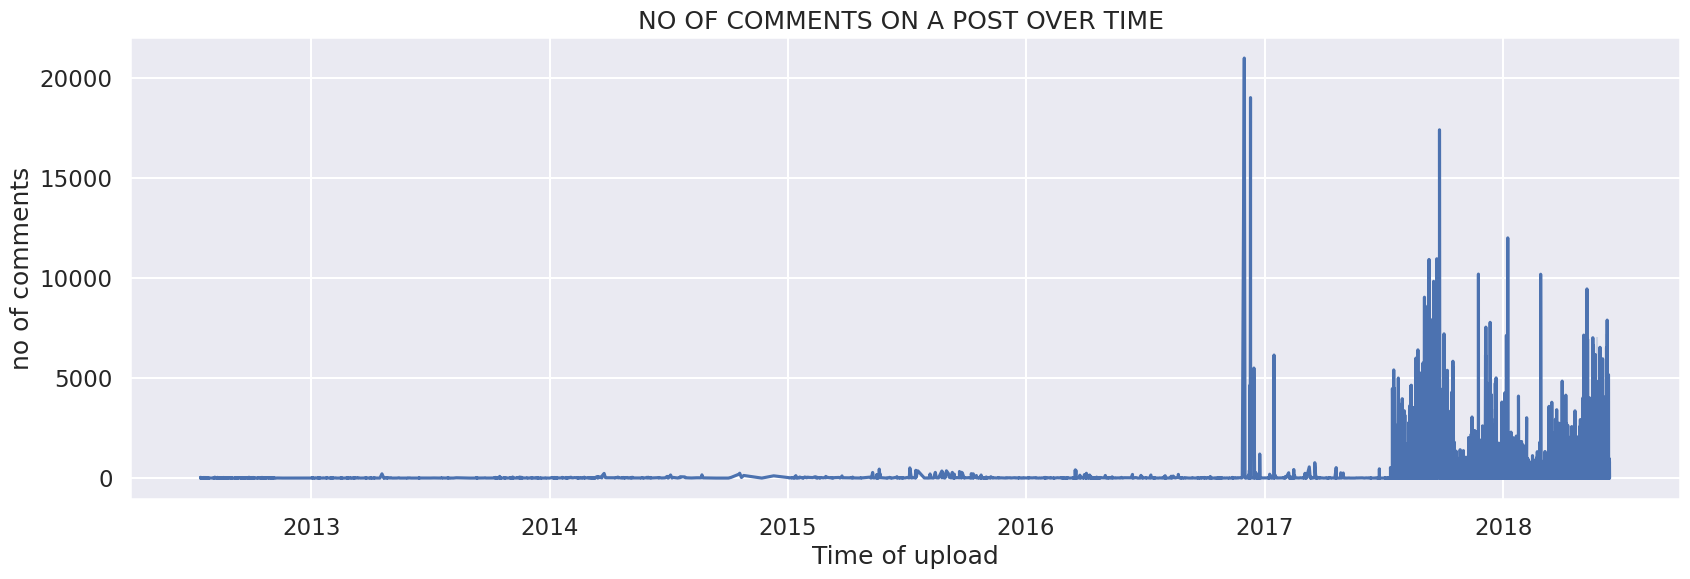

In [229]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.title('NO OF COMMENTS ON A POST OVER TIME ')
sns.lineplot(y='num_comments',x='status_published',data = fb_data)
plt.xlabel('Time of upload')
plt.ylabel('no of comments')
plt.show()


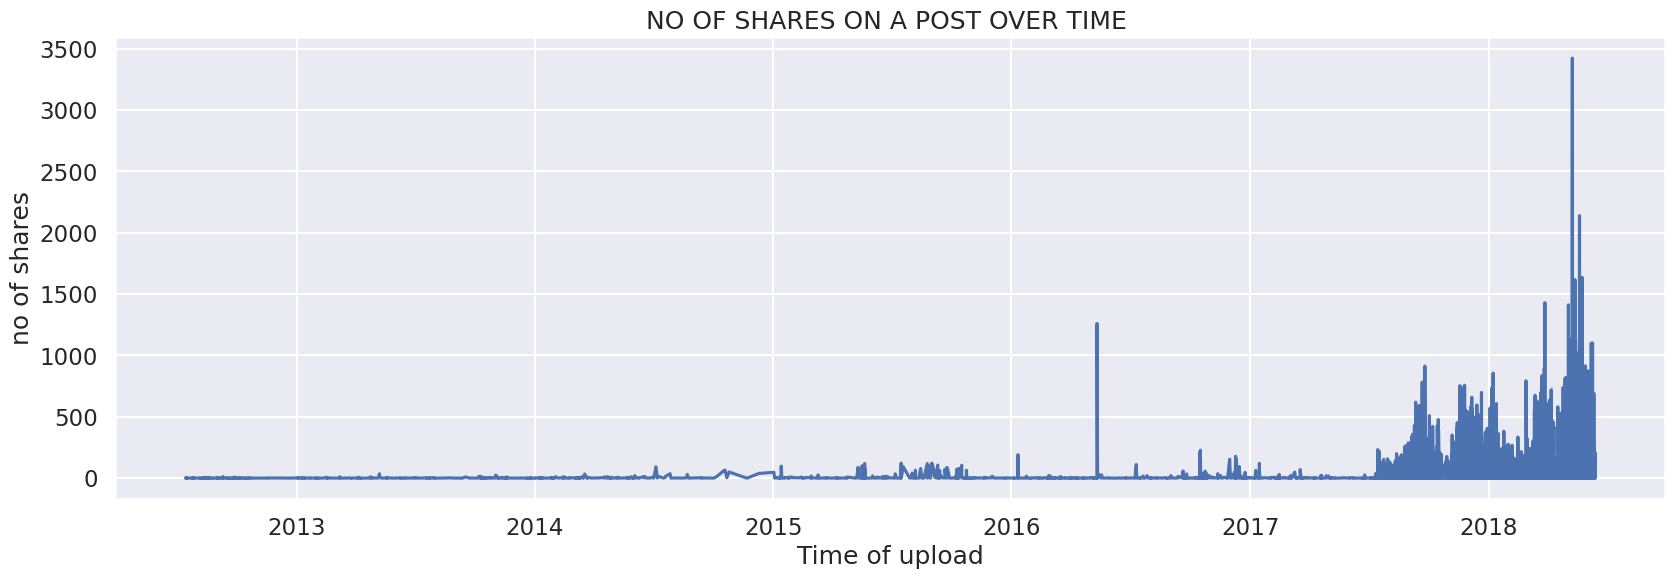

In [232]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.title('NO OF SHARES ON A POST OVER TIME ')
sns.lineplot(y='num_shares',x='status_published',data = fb_data)
plt.xlabel('Time of upload')
plt.ylabel('no of shares')
plt.show()

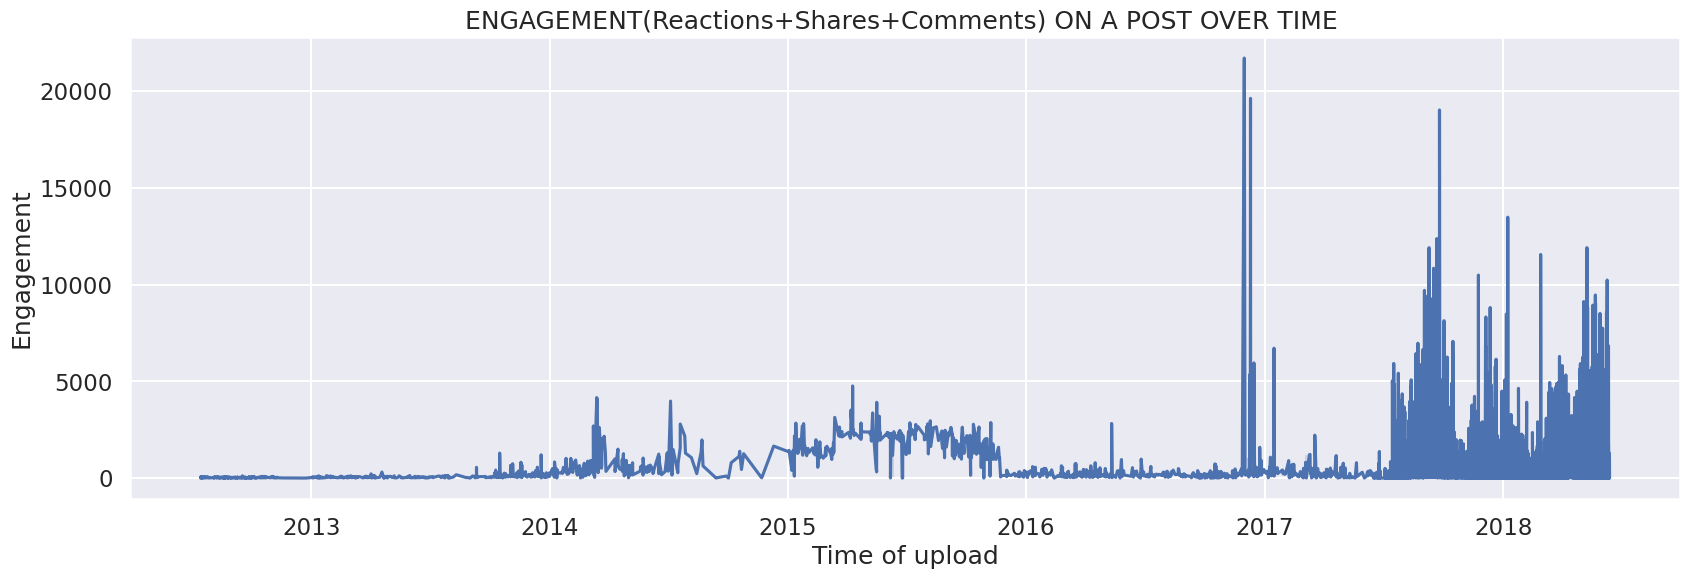

In [233]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.title('ENGAGEMENT(Reactions+Shares+Comments) ON A POST OVER TIME ')
sns.lineplot(y=fb_data.num_reactions + fb_data.num_comments + fb_data.num_shares,x=fb_data.status_published)
plt.xlabel('Time of upload')
plt.ylabel('Engagement')
plt.show()

In [235]:
plt_data = fb_data.groupby('status_type').aggregate({
    'num_reactions':['mean'],
    'num_comments':['mean'],
    'num_shares':['mean']
})
plt_data

,num_reactions,num_comments,num_shares
,mean,mean,mean
status_type,,,
link,370.142857,5.698413,4.396825
photo,181.290345,15.993470,2.553871
status,438.783562,36.238356,2.558904
video,283.409597,642.478149,115.679949


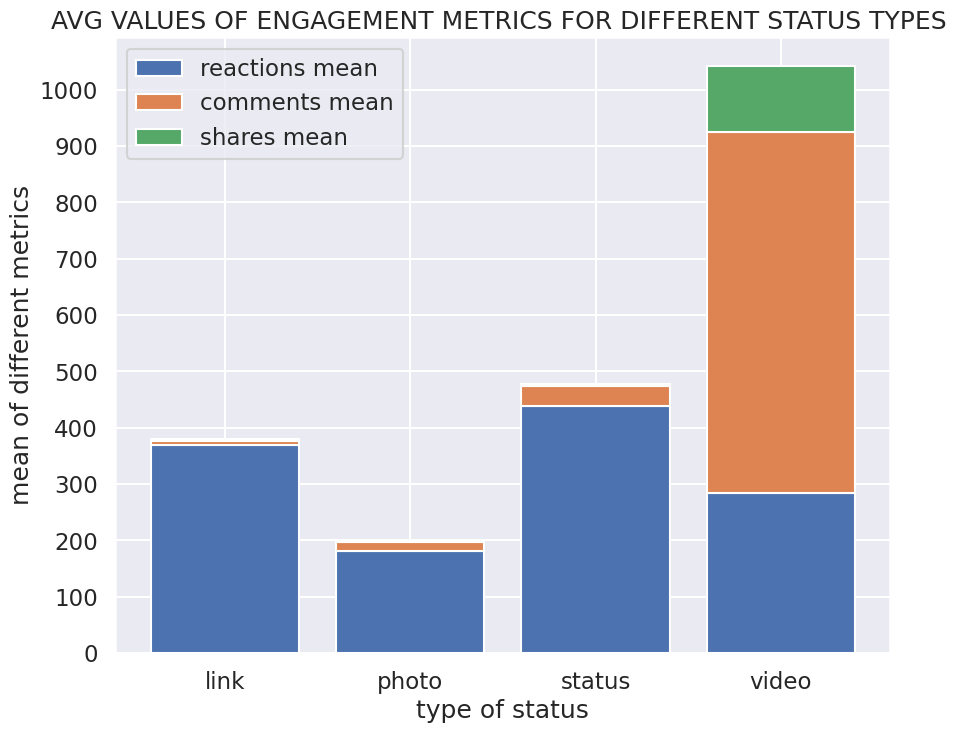

In [243]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.title('AVG VALUES OF ENGAGEMENT METRICS FOR DIFFERENT STATUS TYPES ')
plt.bar(plt_data.index,plt_data.num_reactions.loc[:,'mean'])
plt.bar(plt_data.index,plt_data.num_comments.loc[:,'mean'],bottom=plt_data.num_reactions.loc[:,'mean'])
plt.bar(plt_data.index,plt_data.num_shares.loc[:,'mean'],bottom=plt_data.num_reactions.loc[:,'mean']+plt_data.num_comments.loc[:,'mean'])
plt.legend(labels=['reactions mean','comments mean','shares mean'])
plt.yticks(ticks=list(range(0,1100,100)))
plt.xlabel('type of status')
plt.ylabel('mean of different metrics')
plt.show()


In [20]:
rect_list = [
((fb_data.num_likes/fb_data.num_reactions).mean())*100,
((fb_data.num_loves/fb_data.num_reactions).mean())*100,
((fb_data.num_wows/fb_data.num_reactions).mean())*100,
((fb_data.num_hahas/fb_data.num_reactions).mean())*100,
((fb_data.num_sads/fb_data.num_reactions).mean())*100,
((fb_data.num_angrys/fb_data.num_reactions).mean())*100
]
rect_keys = [
    'likes',
    'loves','wows','hahas','sads','angrys']

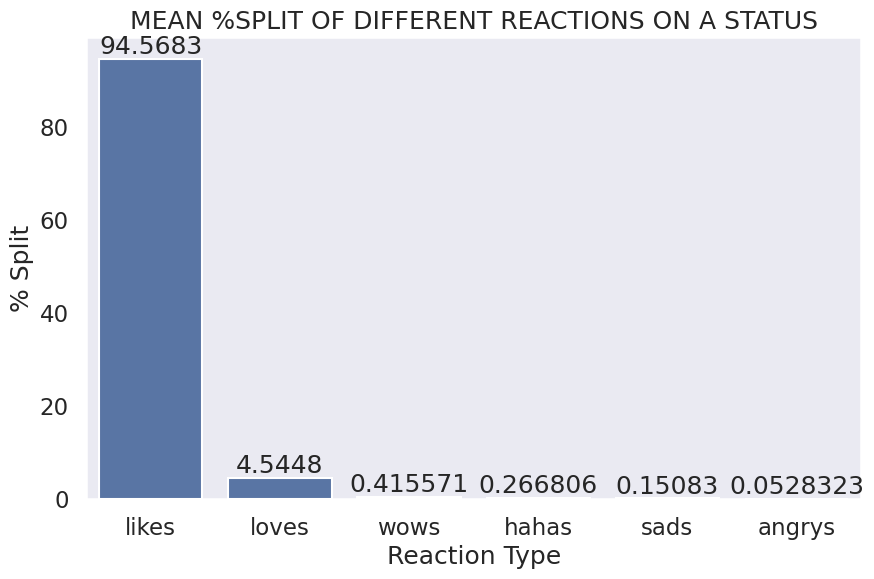

In [252]:
plt.figure(figsize=(10,6))
plt.grid(False)
plt.title('MEAN %SPLIT OF DIFFERENT REACTIONS ON A STATUS')
barr = sns.barplot(x=rect_keys,y=rect_list)
barr.bar_label(barr.containers[0])
plt.ylabel('% Split')
plt.xlabel('Reaction Type')
plt.show()

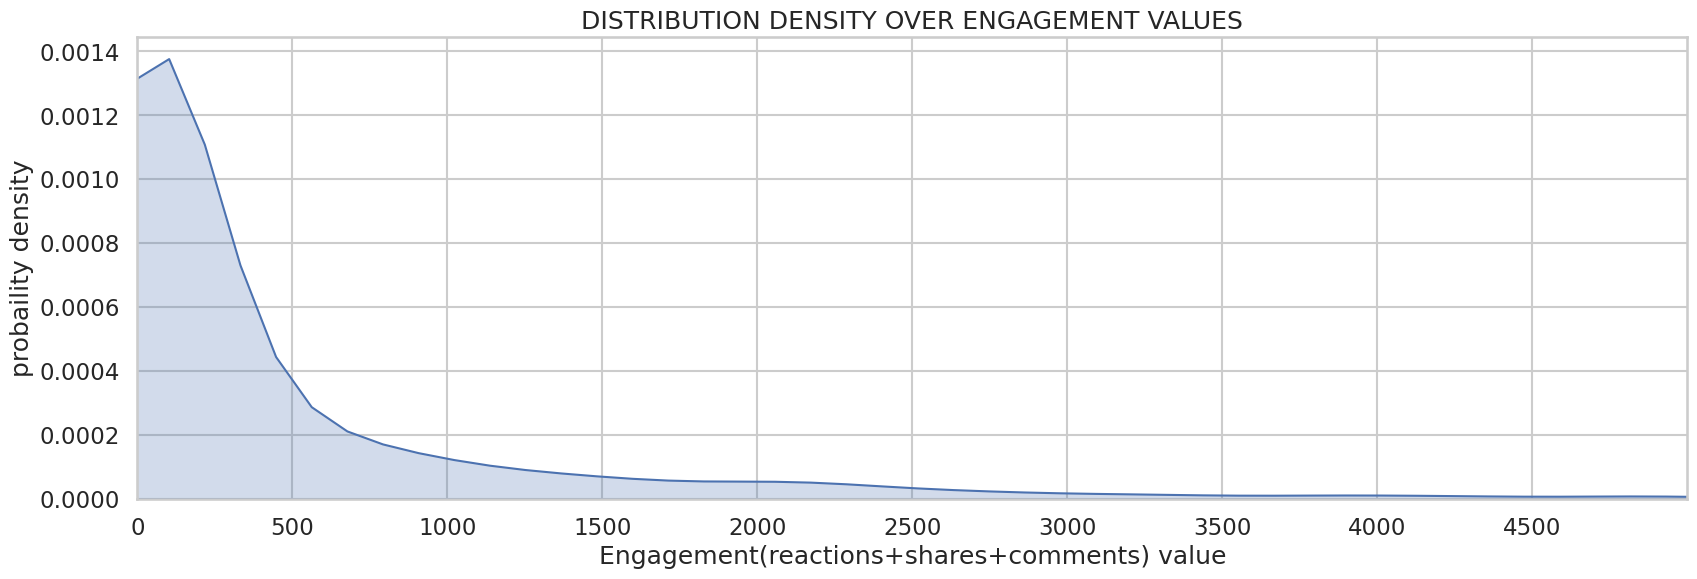

In [274]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
plt.title('DISTRIBUTION DENSITY OVER ENGAGEMENT VALUES')
sns.kdeplot(fb_data.num_reactions + fb_data.num_comments +fb_data.num_shares,fill=True)
plt.xlim(0,5000)
plt.xticks(ticks=list(range(0,5000,500)))
plt.xlabel('Engagement(reactions+shares+comments) value')
plt.ylabel('probaility density')
plt.show()

In [46]:
(fb_data.num_reactions + fb_data.num_comments +fb_data.num_shares).describe()

count     7050.000000
mean       494.495745
std       1152.169364
min          0.000000
25%         19.000000
50%         69.000000
75%        419.000000
max      21708.000000
dtype: float64

In [59]:
percentiles = [i/10 for i in range (1,11)]
percentile_dict = dict((fb_data.num_reactions + fb_data.num_comments +fb_data.num_shares).describe(percentiles=percentiles))
percentile_dict = dict([(i,percentile_dict[i]) for i in percentile_dict.keys() if i[-1] == '%'])

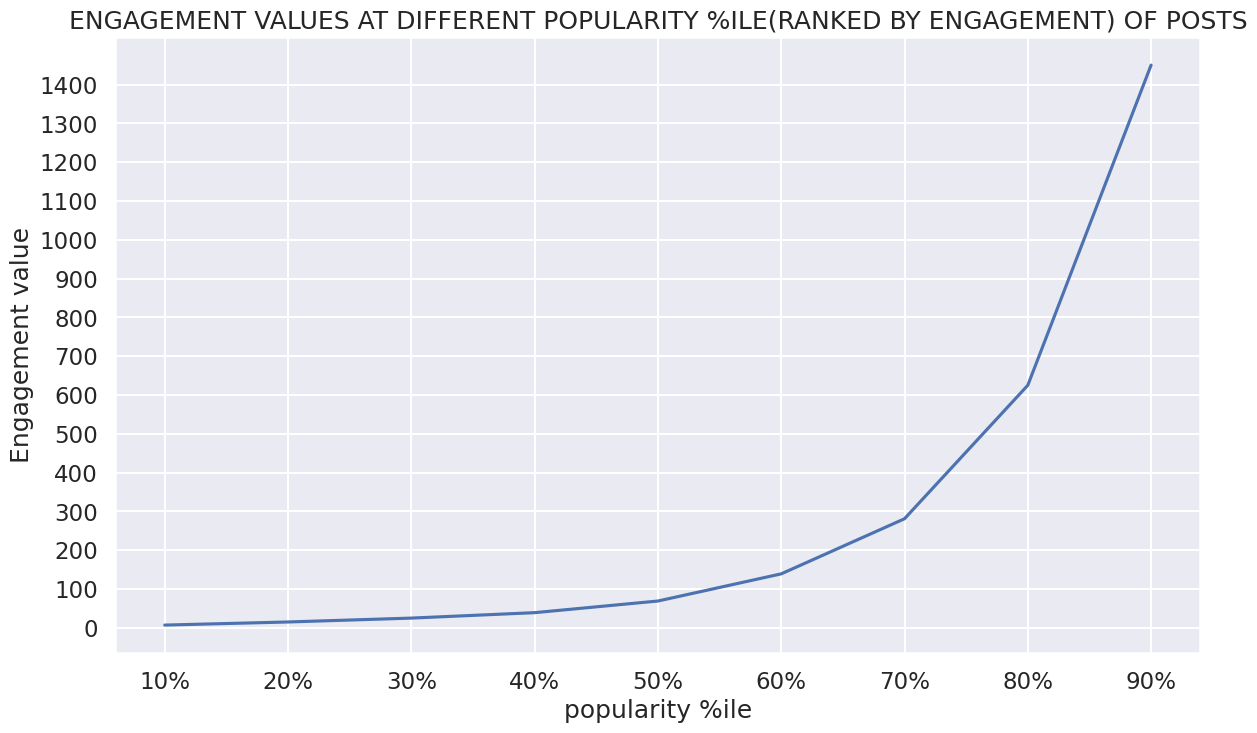

In [280]:
plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
plt.title('ENGAGEMENT VALUES AT DIFFERENT POPULARITY %ILE(RANKED BY ENGAGEMENT) OF POSTS')
# sns.set_theme('talk')
sns.lineplot(data=percentile_dict)
plt.yticks(ticks=list(range(0,1500,100)))
plt.xlabel('popularity %ile')
plt.ylabel('Engagement value')
plt.show()

In [107]:
percen_list = [(0.0,'0%')]+([(percentile_dict[i],i) for i in percentile_dict])
def get_rank(x):
    for i in range(len(percen_list)-1):
        if((x>=percen_list[i][0])and(x<percen_list[i+1][0])):
            return percen_list[i][1]
    return '90%'

In [108]:
fb_data['rank'] = (fb_data.num_reactions + fb_data.num_comments +fb_data.num_shares).map(get_rank)

In [20]:
fb_data['total_actv'] = fb_data.num_reactions + fb_data.num_comments + fb_data.num_shares

In [133]:
fb_data['rank'] = fb_data['rank'].map(lambda x: x[:-1])

In [281]:
plt_data=fb_data.groupby('rank').status_type.value_counts()
plt_data = plt_data.unstack()
plt_data.index = plt_data.index.astype('int')

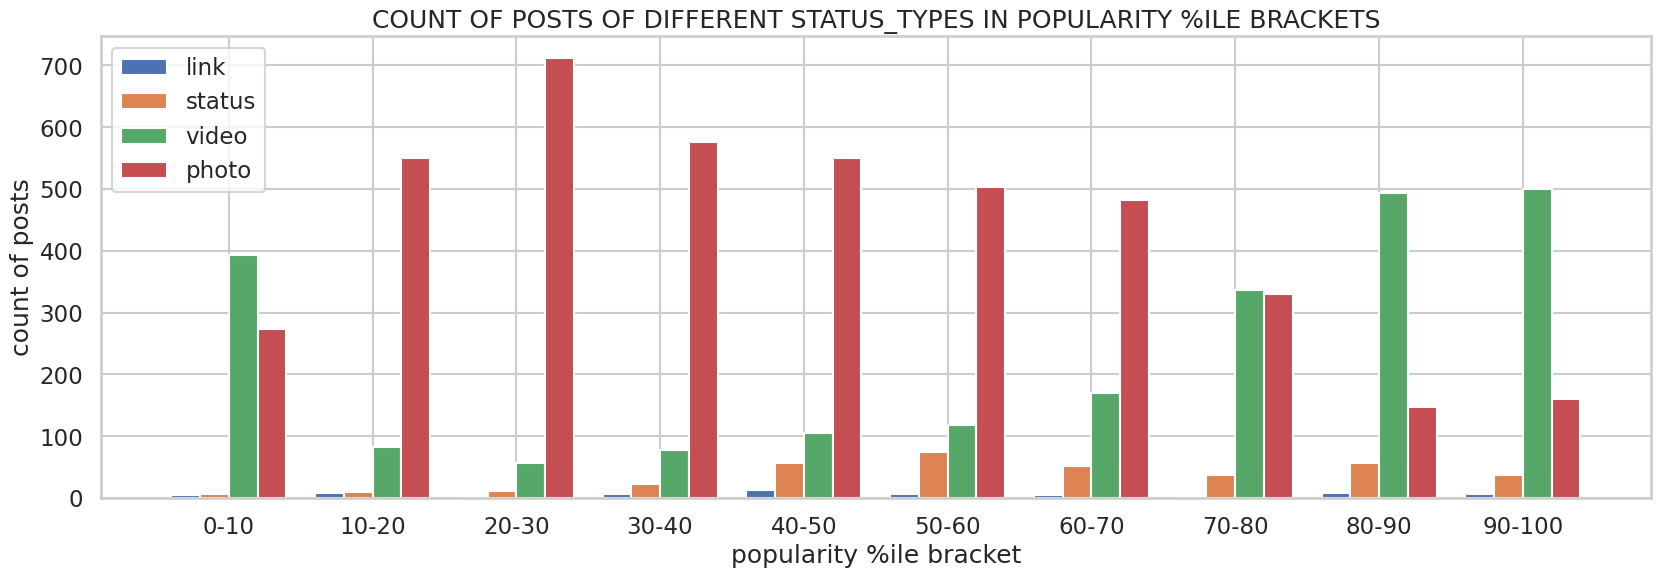

In [283]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
plt.title('COUNT OF POSTS OF DIFFERENT STATUS_TYPES IN POPULARITY %ILE BRACKETS')
positions = list(range(1,11,1))
wid = 0.2
dev = [-wid*1.5,-wid*0.5,wid*0.5,wid*1.5]
plt.bar(plt_data.index//10+1+dev[0],plt_data.link,width=wid,label='link')
plt.bar(plt_data.index//10+1+dev[1],plt_data.status,width=wid,label='status')
plt.bar(plt_data.index//10+1+dev[2],plt_data.video,width=wid,label='video')
plt.bar(plt_data.index//10+1+dev[3],plt_data.photo,width=wid,label='photo')
plt.xticks(positions,[f'{x}-{x+10}' for x in range(0,100,10)])
plt.legend()
plt.xlabel('popularity %ile bracket')
plt.ylabel('count of posts')
plt.show()

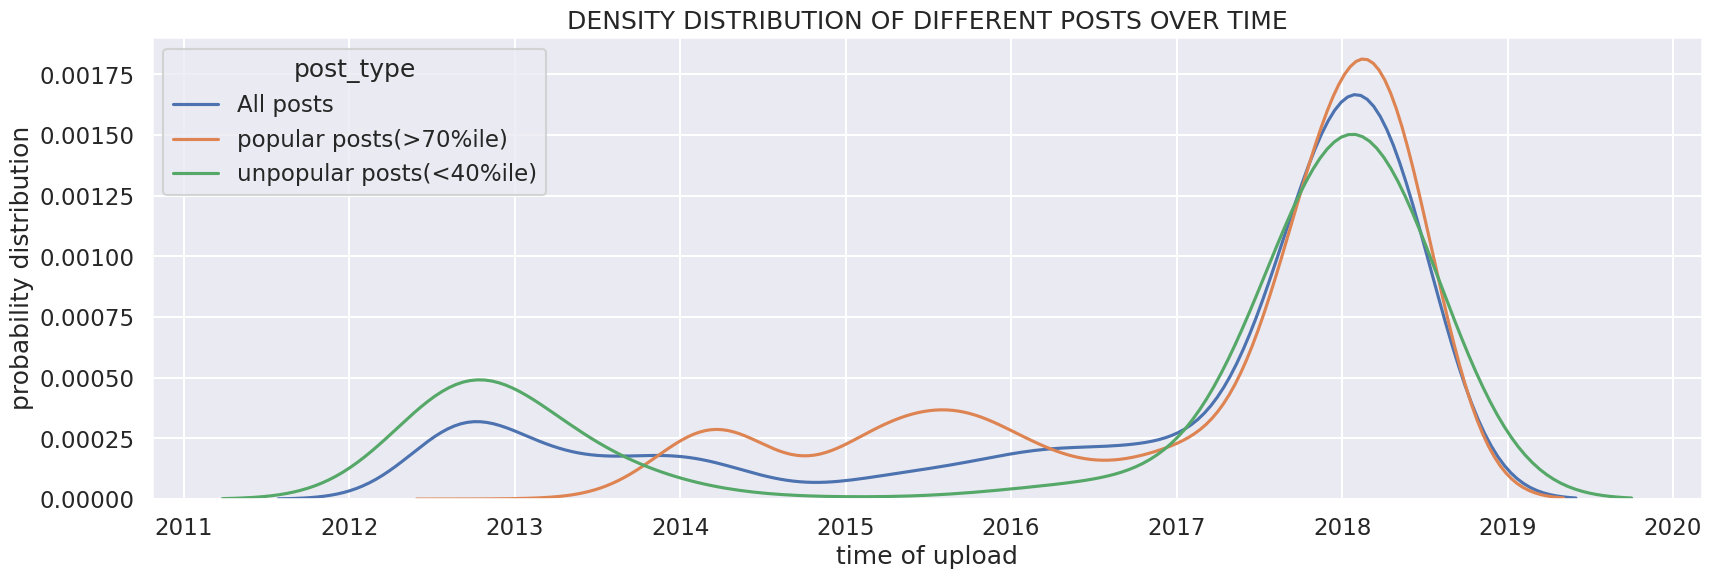

In [297]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
plt.title('DISTRIBUTION OF DIFFERENT POSTS OVER TIME')
sns.kdeplot(fb_data['status_published'])
sns.kdeplot(fb_data[fb_data['rank']>='70'].status_published)
sns.kdeplot(fb_data[fb_data['rank']<='40'].status_published)
plt.ylabel('probability distribution')
plt.xlabel('time of upload')
plt.legend(labels=['All posts','popular posts(>70%ile)','unpopular posts(<40%ile)'],loc='upper left',title='post_type')

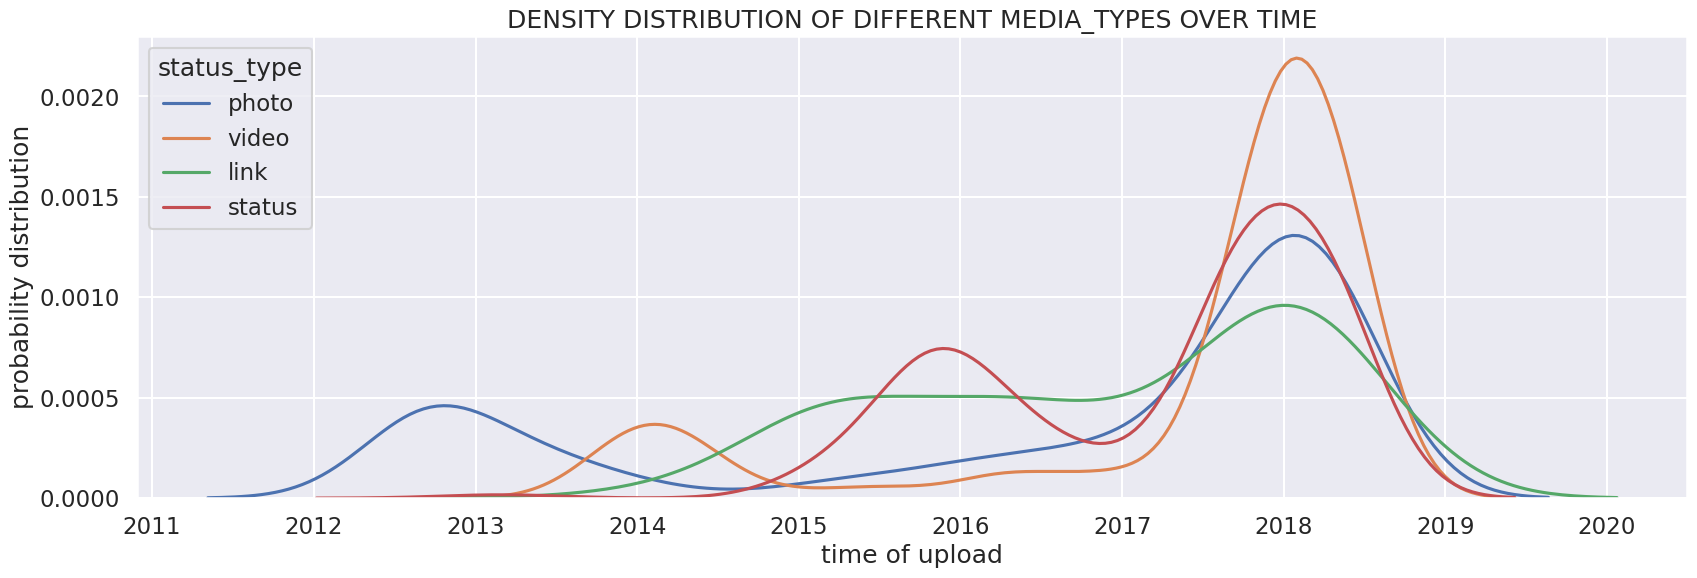

In [4]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.set_theme('talk')
plt.title('DENSITY DISTRIBUTION OF DIFFERENT MEDIA_TYPES OVER TIME')
sns.kdeplot(fb_data[fb_data.status_type == 'photo'].status_published)
sns.kdeplot(fb_data[fb_data.status_type == 'video'].status_published)
sns.kdeplot(fb_data[fb_data.status_type == 'link'].status_published)
sns.kdeplot(fb_data[fb_data.status_type == 'status'].status_published)
plt.legend(labels=['photo','video','link','status'],loc='upper left',title='status_type')
plt.ylabel('probability distribution')
plt.xlabel('time of upload')
plt.show()


In [14]:
fb_data['hour'] = (fb_data['status_published'].dt.hour)

([<matplotlib.axis.XTick at 0x7069bf0e6c90>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

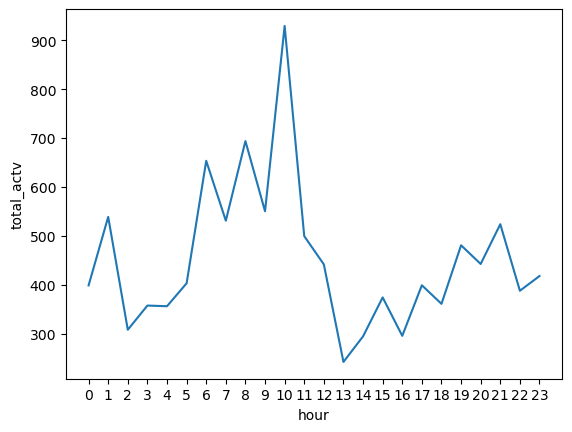

In [21]:
sns.lineplot(data = fb_data.groupby('hour').total_actv.mean())
plt.xticks(ticks=list(range(24)))